In [1]:
import pandas as pd

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\SC_DS_Projects\Delivery Duration Prediction, DoorDash\data\historical_data.csv"
df = pd.read_csv(path)
df.head(1)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0


In [12]:
df[df['total_onshift_dashers'] < df['total_busy_dashers']]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,delivery_duration_2,day_of_week,created_at_day
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,01:07:04,Tuesday,2015-02-10
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0,00:32:45,Thursday,2015-02-12
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,00:37:53,Thursday,2015-02-12
18,1.0,2015-01-31 04:35:54,2015-01-31 05:47:30,2841,italian,1.0,2,3150,2,1425,1725,4.0,9.0,12.0,446,548.0,4296.0,01:11:36,Saturday,2015-01-31
20,1.0,2015-01-31 23:45:12,2015-02-01 00:14:05,4139,mexican,1.0,5,1285,3,150,400,12.0,13.0,11.0,446,424.0,1733.0,00:28:53,Saturday,2015-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197411,1.0,2015-02-02 17:50:23,2015-02-02 18:12:57,2956,fast,4.0,2,1297,2,369,639,5.0,6.0,7.0,251,186.0,1354.0,00:22:34,Monday,2015-02-02
197412,1.0,2015-02-10 23:43:08,2015-02-11 00:47:24,2956,fast,4.0,1,674,1,345,345,10.0,11.0,12.0,251,706.0,3856.0,01:04:16,Tuesday,2015-02-10
197418,1.0,2015-01-30 20:50:23,2015-01-30 22:24:38,2956,fast,4.0,2,1528,2,639,729,26.0,29.0,34.0,251,791.0,5655.0,01:34:15,Friday,2015-01-30
197422,1.0,2015-01-31 19:48:15,2015-01-31 20:27:39,2956,fast,4.0,7,2445,3,145,585,23.0,24.0,24.0,251,608.0,2364.0,00:39:24,Saturday,2015-01-31


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [3]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [4]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df['delivery_duration_2'] = df['delivery_duration'].dropna().apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)

df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,delivery_duration_2
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,00:39:50


(array([ 1333., 46023., 82542., 43615., 15746.,  5199.,  1732.,   621.,
          283.,   135.]),
 array([ 101. , 1090.6, 2080.2, 3069.8, 4059.4, 5049. , 6038.6, 7028.2,
        8017.8, 9007.4, 9997. ]),
 <BarContainer object of 10 artists>)

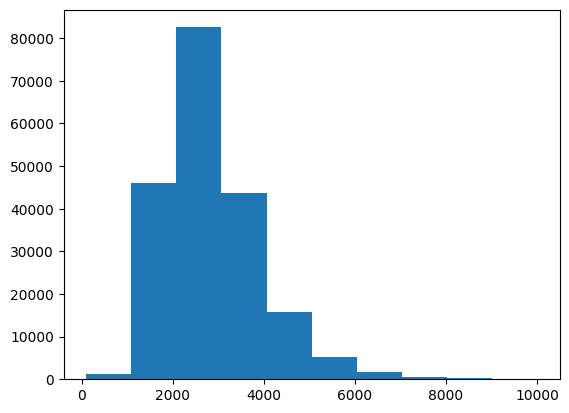

In [6]:
import matplotlib.pyplot as plt
plt.hist(df[df['delivery_duration']<10000]['delivery_duration'])

In [7]:
df_2 = df.groupby('store_id').agg({'delivery_duration':'mean'}).reset_index().sort_values(by='delivery_duration', ascending=False)
df_2['delivery_duration_2'] = df_2['delivery_duration'].apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)
df_2

,store_id,delivery_duration,delivery_duration_2
3425,3560,504437.764706,140:07:17
4179,4338,19501.714286,05:25:01
1994,2065,15553.000000,04:19:13
6196,6426,13615.000000,03:46:55
931,974,9630.000000,02:40:30
...,...,...,...
5284,5480,1224.500000,00:20:24
5617,5825,1116.000000,00:18:36
4917,5102,1083.000000,00:18:03
2124,2202,1051.000000,00:17:31


In [8]:
df_3 = df.groupby('total_items').agg({'delivery_duration':'mean'}).reset_index().sort_values(by='delivery_duration', ascending=False)
df_3['delivery_duration_2'] = df_3['delivery_duration'].apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)
df_3

,total_items,delivery_duration,delivery_duration_2
42,43,5924.000000,01:38:44
37,38,4621.500000,01:17:01
55,84,4478.000000,01:14:38
35,36,4223.250000,01:10:23
49,51,4197.000000,01:09:57
48,50,4015.500000,01:06:55
44,45,3864.000000,01:04:24
39,40,3757.250000,01:02:37
38,39,3707.333333,01:01:47
26,27,3528.666667,00:58:48


In [9]:
df['day_of_week'] = df['created_at'].dt.day_name()
df_4 = df.groupby('day_of_week').agg({'delivery_duration':'mean'}).reset_index().sort_values(by='delivery_duration', ascending=False)
df_4['delivery_duration_2'] = df_4['delivery_duration'].apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)
df_4

,day_of_week,delivery_duration,delivery_duration_2
3,Sunday,3163.244534,00:52:43
1,Monday,3102.781439,00:51:42
2,Saturday,3005.173128,00:50:05
4,Thursday,2826.104624,00:47:06
5,Tuesday,2779.843731,00:46:19
0,Friday,2684.771085,00:44:44
6,Wednesday,2668.265606,00:44:28


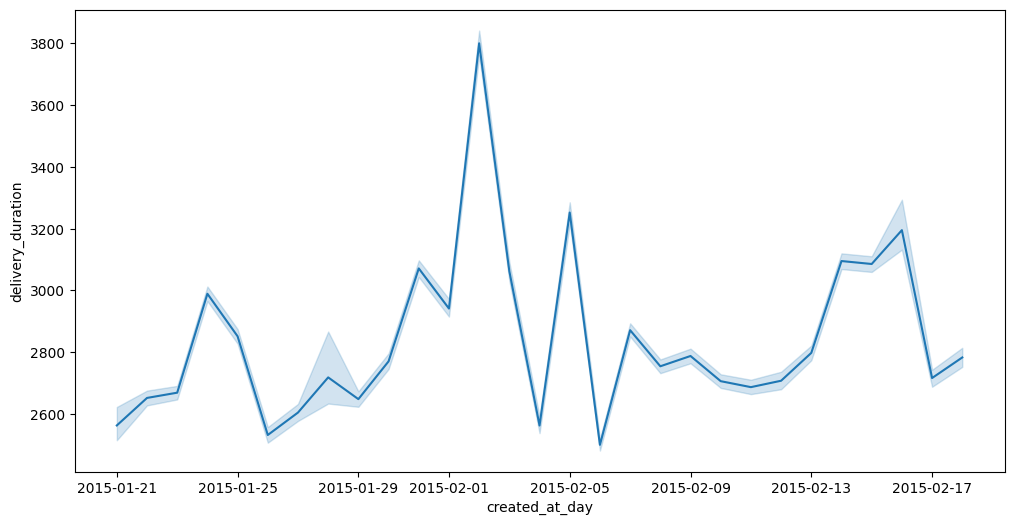

In [10]:
import seaborn as sns

df['created_at_day'] = df['created_at'].dt.date
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at_day', y='delivery_duration', data=df[df['delivery_duration']<1000000])
plt.show()

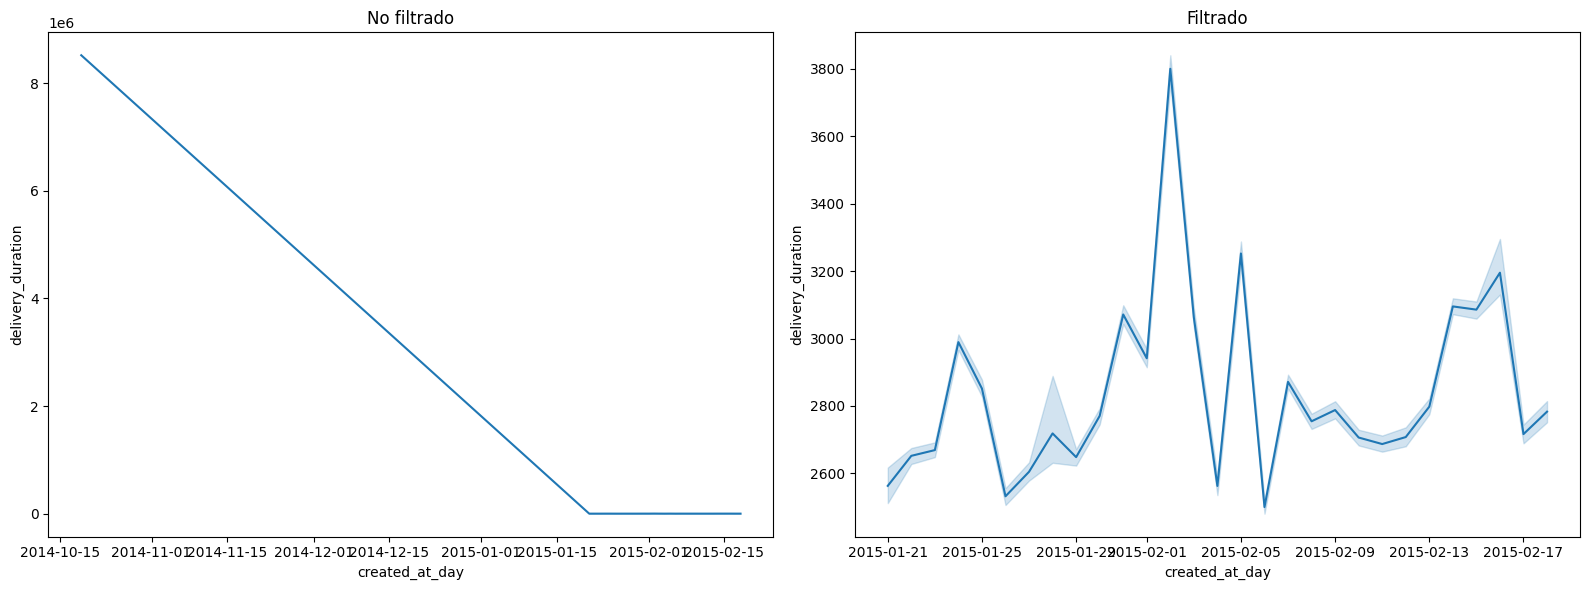

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Dos gráficos horizontales, compartiendo el eje Y

# Primer gráfico
sns.lineplot(
    x='created_at_day', 
    y='delivery_duration', 
    data=df, 
    ax=axes[0]
)
axes[0].set_title("No filtrado")

# Segundo gráfico
sns.lineplot(
    x='created_at_day', 
    y='delivery_duration', 
    data=df[df['delivery_duration'] < 1000000], 
    ax=axes[1]
)
axes[1].set_title("Filtrado")

# Mostrar el resultado
plt.tight_layout()  # Ajustar los espacios entre subgráficos
plt.show()
